<a href="https://colab.research.google.com/github/Samiptekade/bus_booking/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1100 non-null   int64  
 1   P            1100 non-null   int64  
 2   K            1100 non-null   int64  
 3   temperature  1100 non-null   float64
 4   humidity     1100 non-null   float64
 5   ph           1100 non-null   float64
 6   rainfall     1100 non-null   float64
 7   label        1100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 68.9+ KB
None
                 N            P            K  temperature     humidity  \
count  1100.000000  1100.000000  1100.000000  1100.000000  1100.000000   
mean     56.635455    51.611818    63.670000    25.080916    80.728164   
std      41.927282    43.521670    65.368148     4.742818    13.755053   
min       0.000000     5.000000     5.000000     8.825675    45.022364   
25%      19.750000    20.000000    2

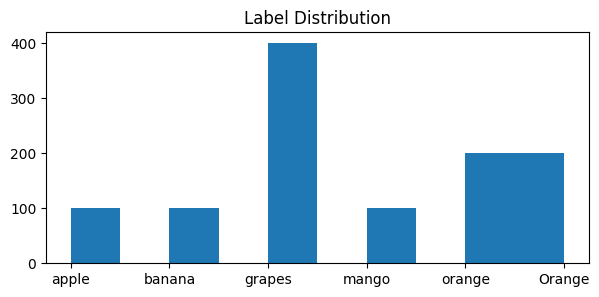

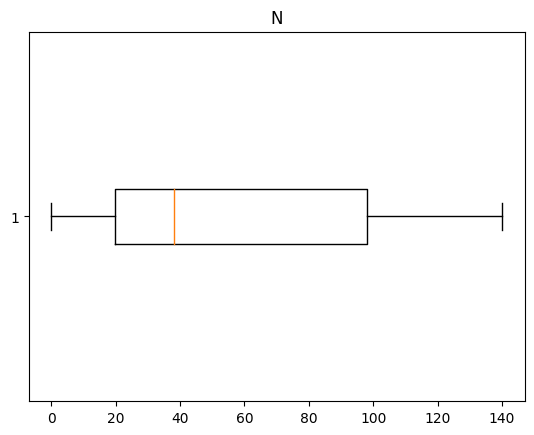

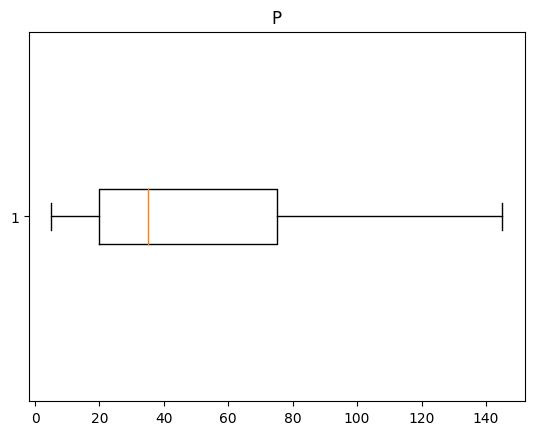

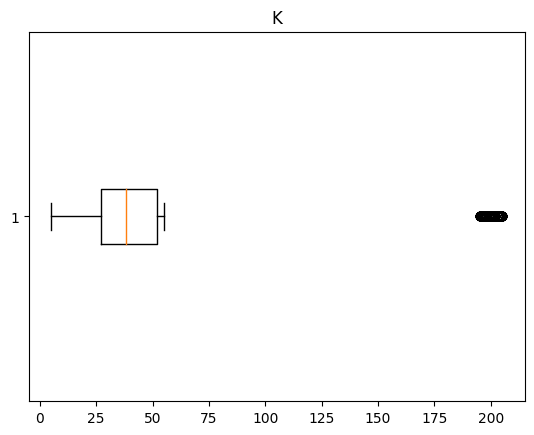

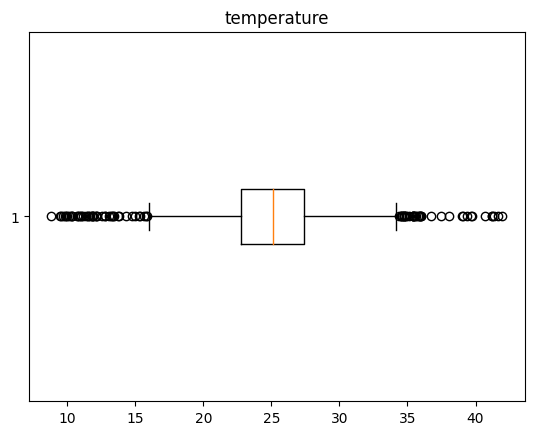

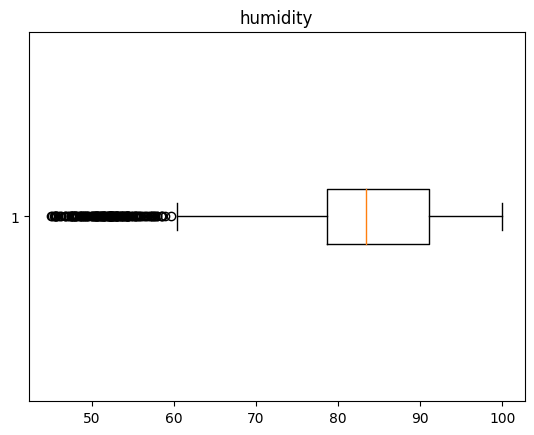

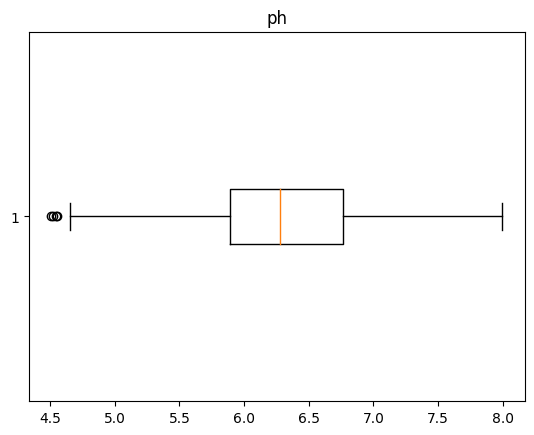

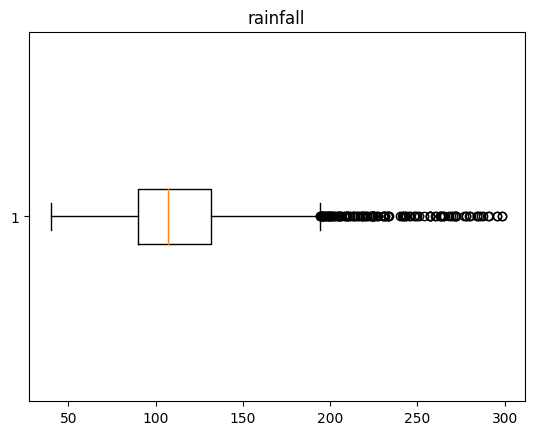

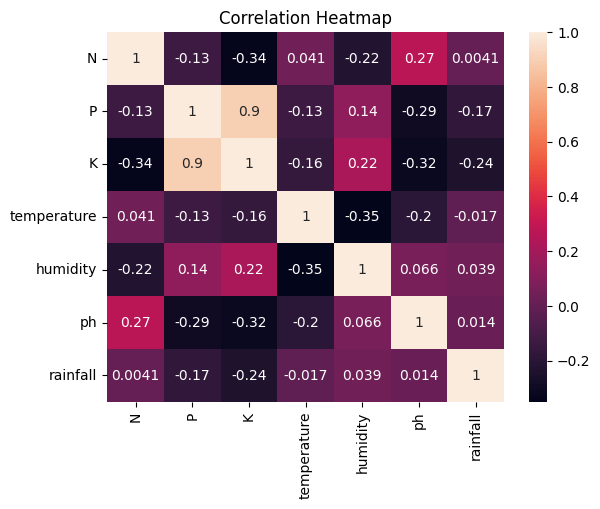

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            712 non-null    int64  
 1   P            712 non-null    int64  
 2   K            712 non-null    int64  
 3   temperature  712 non-null    float64
 4   humidity     712 non-null    float64
 5   ph           712 non-null    float64
 6   rainfall     712 non-null    float64
 7   label        712 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 44.6+ KB
None
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        51

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00     

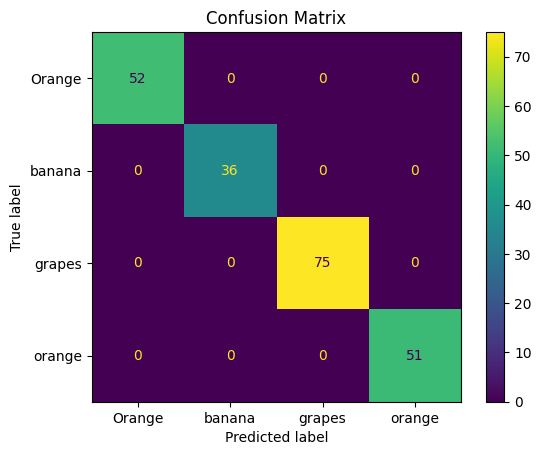

The predicted label for the new sample is: orange


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load data
excel_file_path = '/content/drive/MyDrive/Colab Notebooks/fruit_crops.xlsx'
data = pd.read_excel(excel_file_path)
df = pd.DataFrame(data)

# Data overview
print(df.info())
print(df.describe())
print("Unique labels:", df['label'].unique())

# Plotting
plt.figure(figsize=(7, 3))
plt.hist(df['label'])
plt.title('Label Distribution')
plt.show()

for column in df.columns[:-1]:  # Exclude label column
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.show()

# Correlation heatmap
corr = df.drop(columns=('label')).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Removing outliers
for column in df.columns[:-1]:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Reset index after cleaning
ndf = df.reset_index(drop=True)
print(ndf.info())

# Encoding and scaling
scaler = StandardScaler()
lab_encoder = LabelEncoder()

X = ndf.drop(columns=['label'])
y = lab_encoder.fit_transform(ndf['label'])

# Scaling features
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=lab_encoder.classes_)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()


# Use Case: Predicting the label of a new crop sample
# Adjust this array to match the number of features in your dataset
new_sample = np.array([[5.0, 2.0, 1.5, 3.0, 200, 1.2, 0.5]])  # Replace with actual feature values for 7 features
# Scale the new sample
new_sample_scaled = scaler.transform(new_sample)

# Make prediction
predicted_label_index = model.predict(new_sample_scaled)
predicted_label = lab_encoder.inverse_transform(predicted_label_index)

print(f"The predicted label for the new sample is: {predicted_label[0]}")
